In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')




In [2]:
# creating a connection with database

conn=sqlite3.connect('inventory.db')

# fetching vendor summary data

df=pd.read_sql_query("select* from vendor_sales_summary",conn)
df.head()

,index,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,totalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,Freightcost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,BROWN-FORMAN CORP,36.99,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,MARTIGNETTI COMPANIES,28.99,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,PERNOD RICARD USA,24.99,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,DIAGEO NORTH AMERICA INC,22.99,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,DIAGEO NORTH AMERICA INC,29.99,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,10692.0,5345.500000,3086.658873,0.000000,2672.750000,5345.500000,8018.250000,1.069100e+04
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
totalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollar,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06


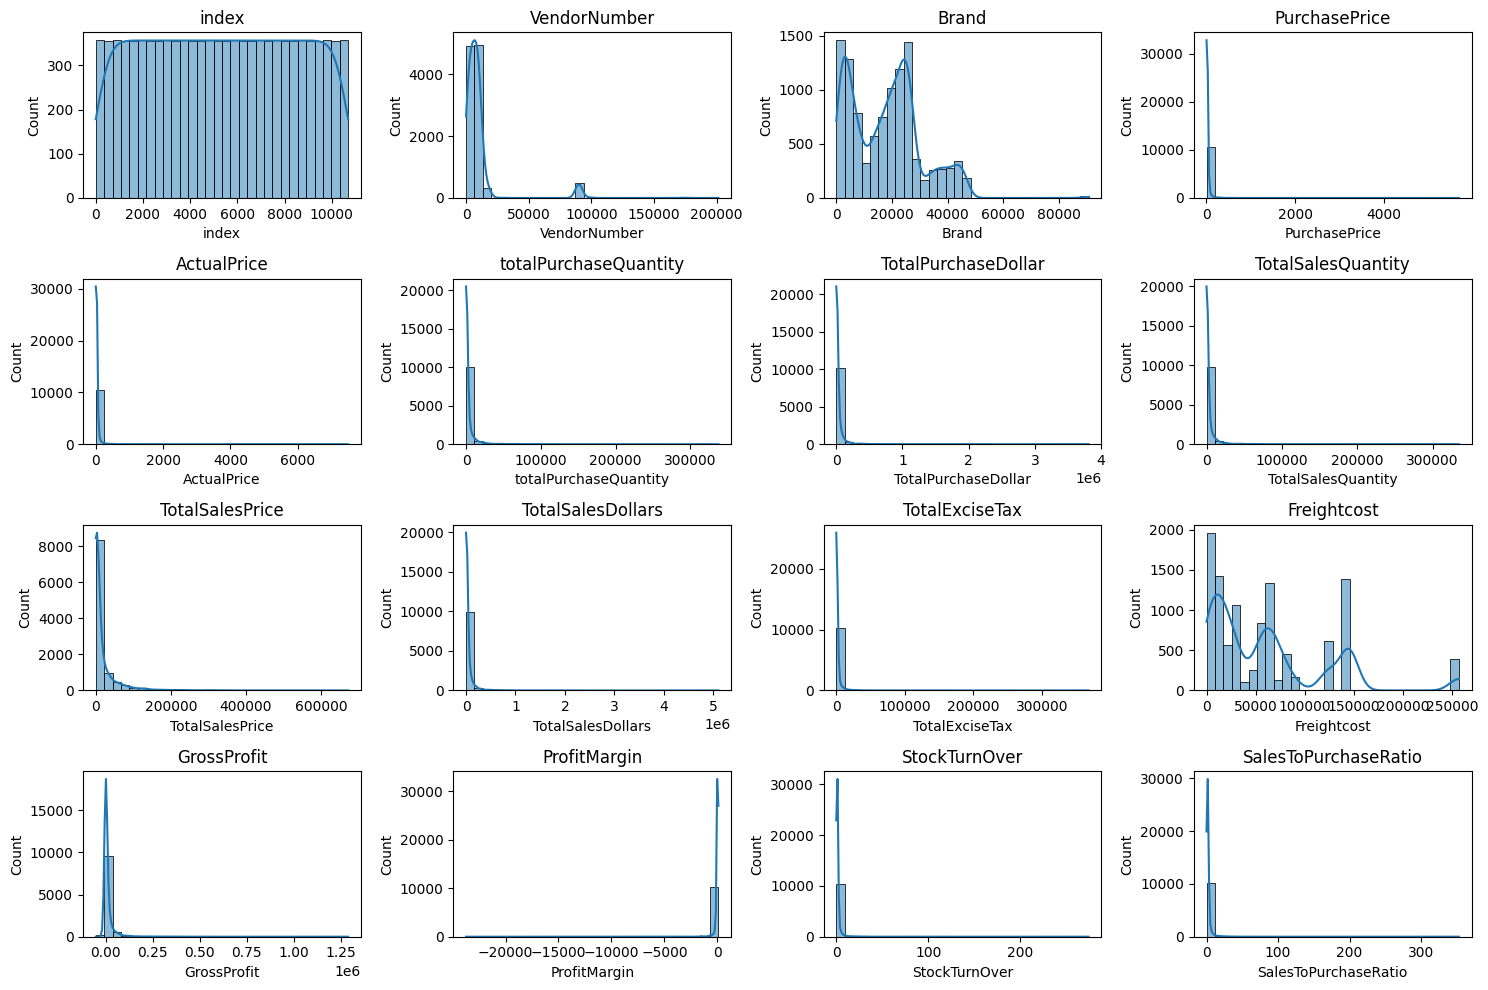

In [4]:
# distribution plots for Numerical columns 
numerical_cols =df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

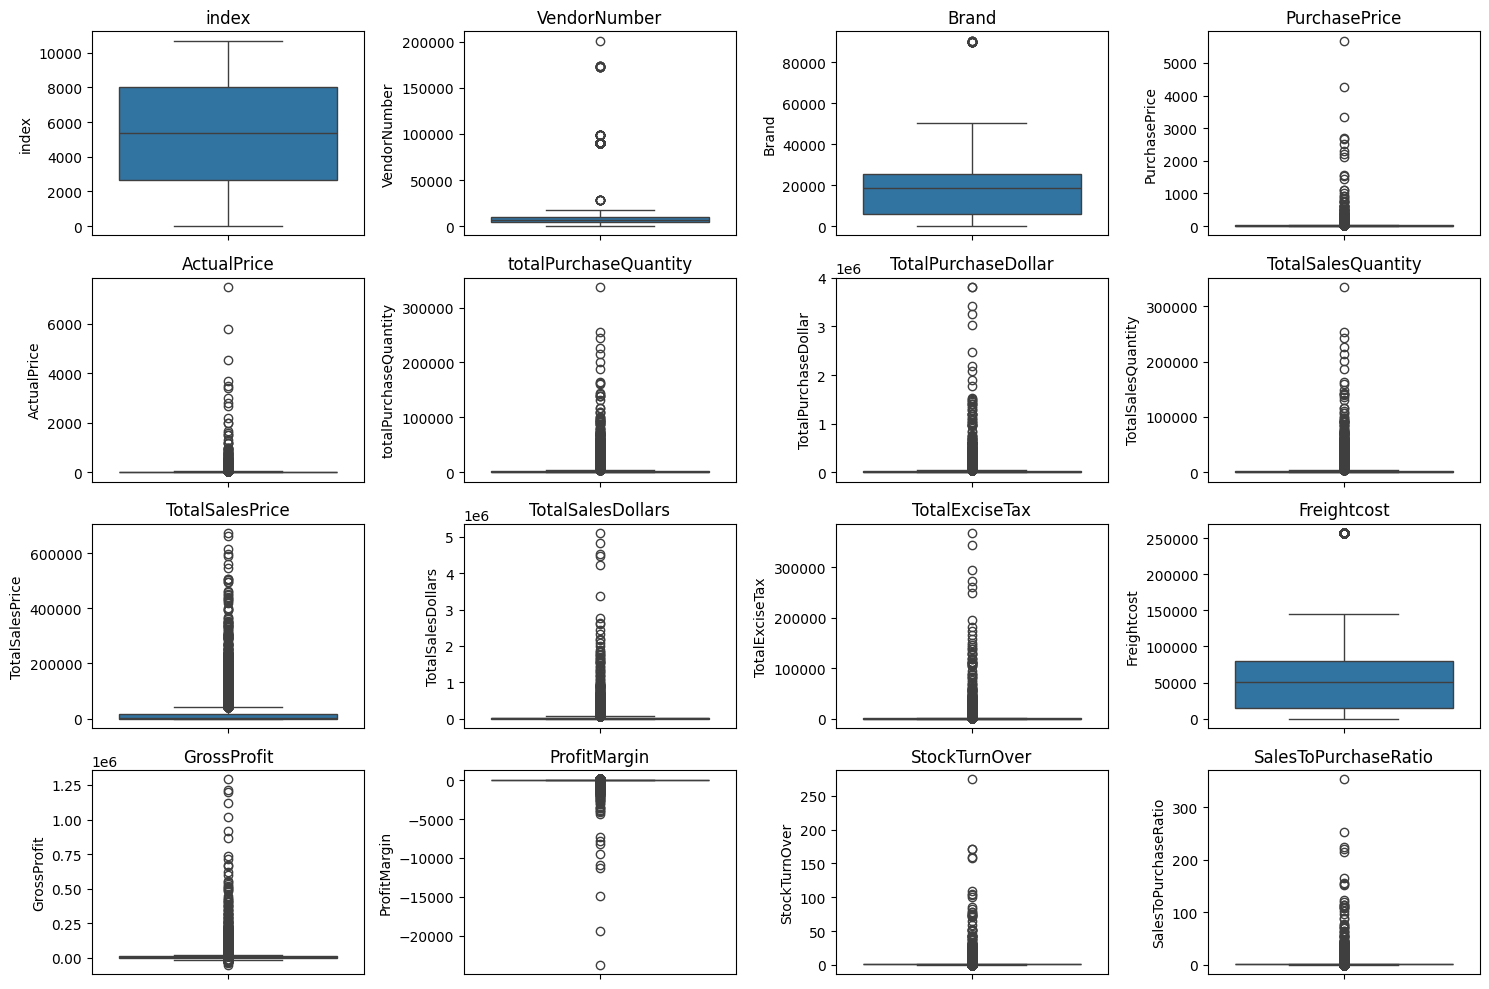

In [5]:
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
# Removing inconsistency from the data 
df= pd.read_sql_query(''' select * from vendor_sales_summary
where GrossProfit >0 
And ProfitMargin >0 
And TotalSalesQuantity >0''',conn)

In [7]:
df

,index,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,totalPurchaseQuantity,TotalPurchaseDollar,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,Freightcost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,BROWN-FORMAN CORP,36.99,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,MARTIGNETTI COMPANIES,28.99,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,PERNOD RICARD USA,24.99,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,DIAGEO NORTH AMERICA INC,22.99,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,DIAGEO NORTH AMERICA INC,29.99,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,WINE GROUP INC,4.99,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,SAZERAC CO INC,0.49,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,HEAVEN HILL DISTILLERIES,0.99,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,DIAGEO NORTH AMERICA INC,1.99,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,98.974037,72.000000,97.469388


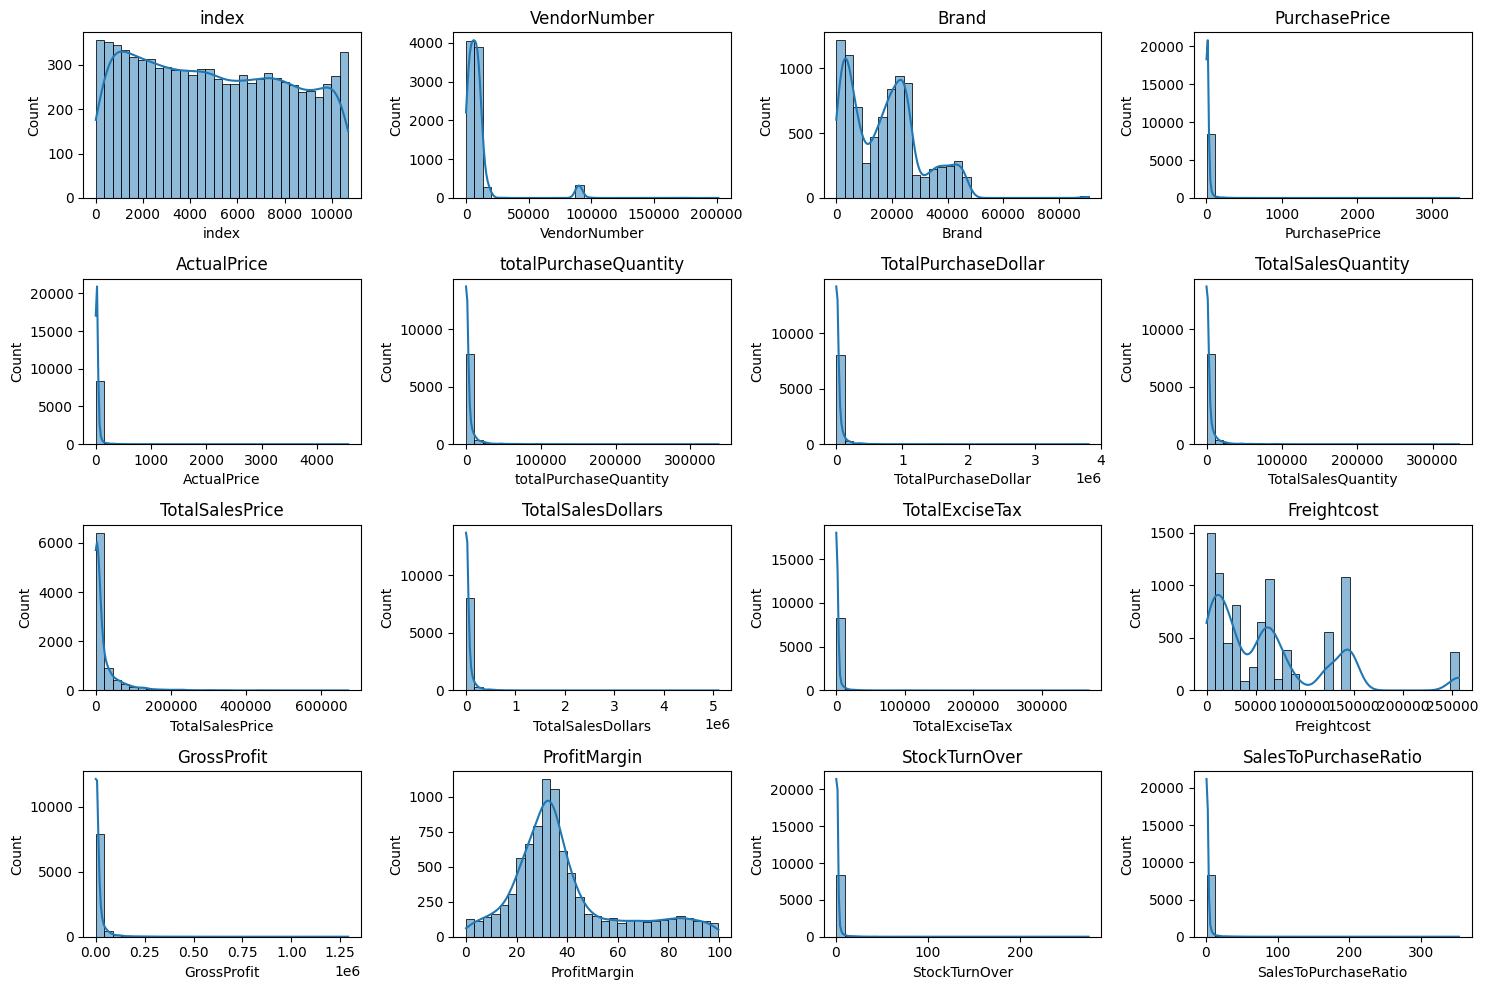

In [8]:
# distribution plots for Numerical columns 
numerical_cols =df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

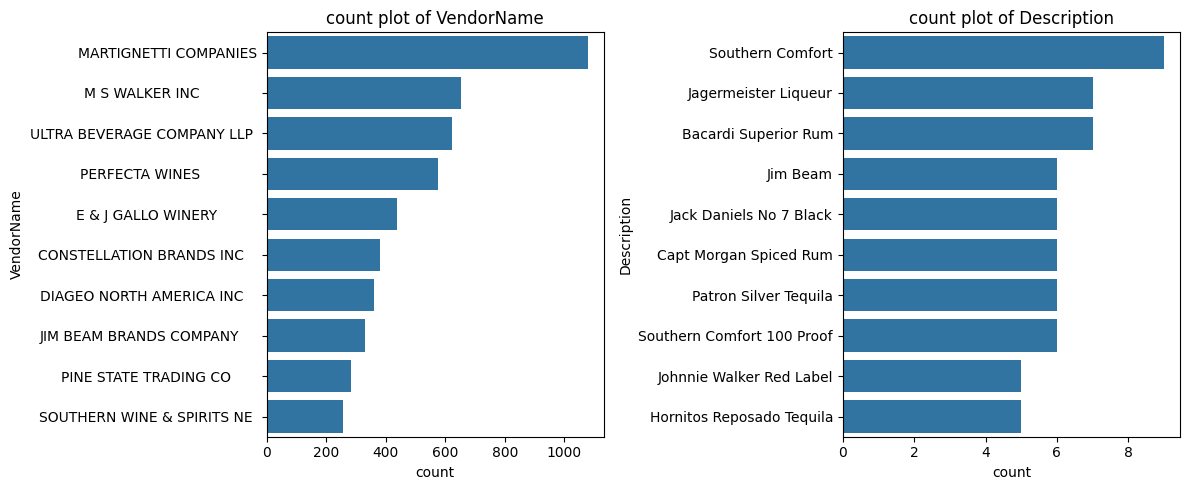

In [9]:
categorical_cols=["VendorName","Description"]
plt.figure(figsize=(12,5))
for i ,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")

plt.tight_layout()
plt.show()

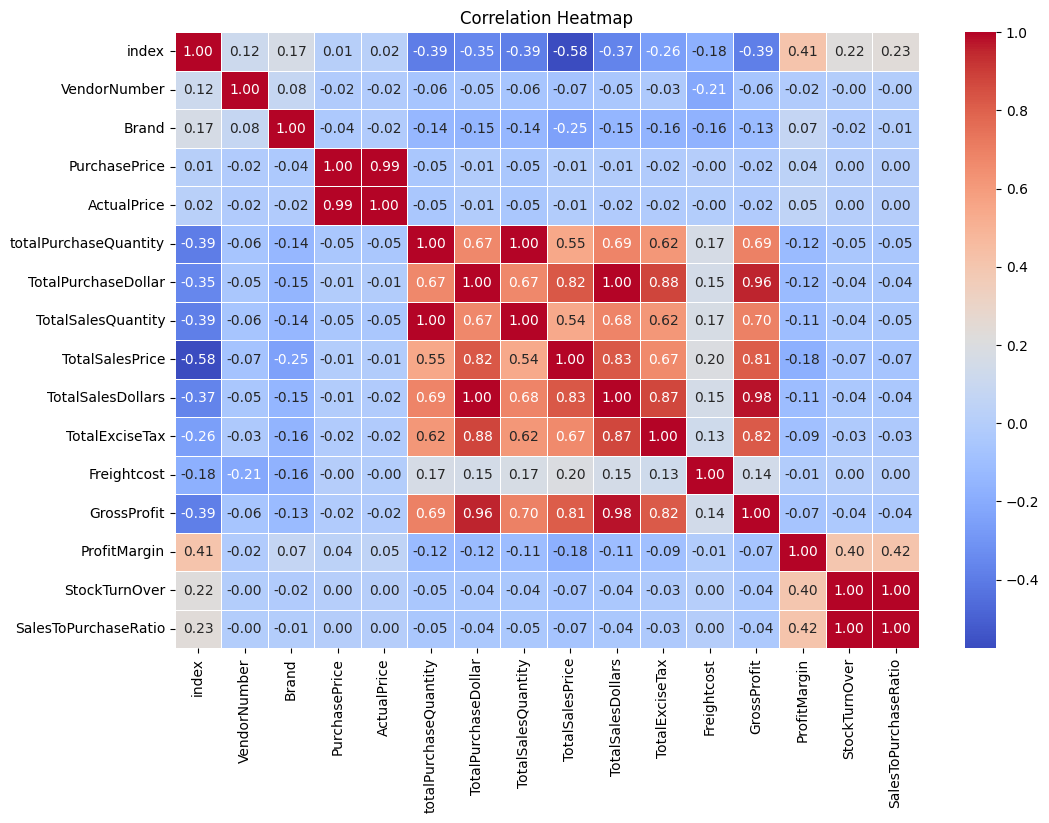

In [10]:
#correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
brand_performance=df.groupby("Description").agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [12]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [13]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)


In [14]:
low_sales_threshold

np.float64(560.299)

In [15]:
high_margin_threshold

np.float64(64.97017552750113)

In [16]:
#filter Brands with low sales and high profit margins
target_brands= brand_performance[
        (brand_performance['TotalSalesDollars']<=low_sales_threshold)&
        (brand_performance['ProfitMargin']>=high_margin_threshold)
]
print("Brands with Low sales but Hight profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low sales but Hight profit margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [17]:
# Filter Brands with TotalSalesDollars < 10000 for better visualization
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]


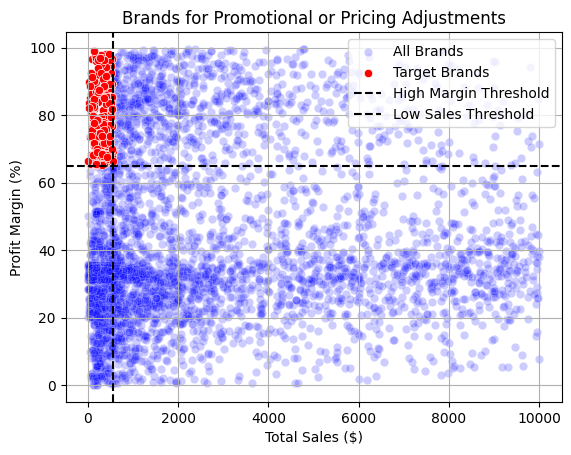

In [18]:
# Plot all brands
sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

# Plot target brands (low sales, high margin)
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="red",
    label="Target Brands"
)

# Threshold lines
plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

# Labels & Title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")

plt.legend()
plt.grid(True)
plt.show()

In [19]:
def format_dollar(value):
   if value>=1000000:
       return f"{value/1000000:.2f}M"
   elif value >=1000:
       return f"{value/1000:.2f}K"
   else:
       return str(value)
       

In [20]:
#Top vendors and brands by sales performance.
Top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
Top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)


In [21]:
Top_vendors

VendorName
DIAGEO NORTH AMERICA INC       67990099.42
MARTIGNETTI COMPANIES          39276398.80
PERNOD RICARD USA              32063196.19
JIM BEAM BRANDS COMPANY        31423020.46
BACARDI USA INC                24854817.14
CONSTELLATION BRANDS INC       24218745.65
E & J GALLO WINERY             18399899.46
BROWN-FORMAN CORP              18247230.65
ULTRA BEVERAGE COMPANY LLP     16502544.31
M S WALKER INC                 14706458.51
Name: TotalSalesDollars, dtype: float64

In [22]:
Top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [23]:
Top_brands.apply(lambda x : format_dollar(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [24]:
Top_vendors.apply(lambda x : format_dollar(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.28M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.50M
M S WALKER INC                 14.71M
Name: TotalSalesDollars, dtype: object

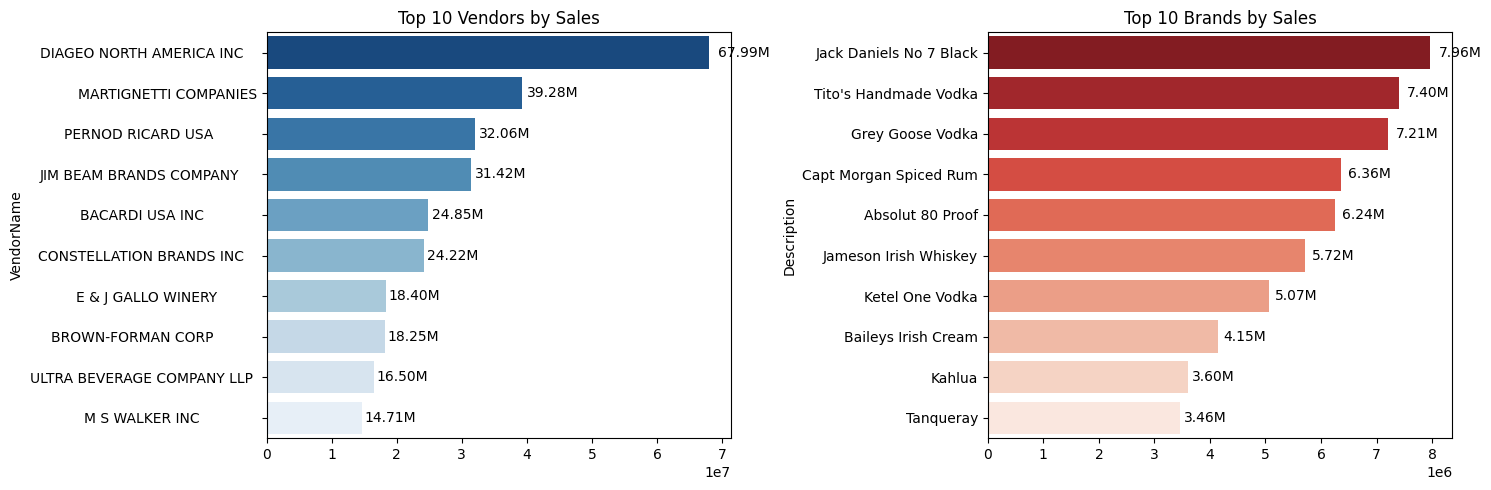

In [25]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=Top_vendors.index, x=Top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollar(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=Top_brands.index.astype(str), x=Top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollar(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

In [26]:
vendor_performance=df.groupby("VendorName").agg({
    'TotalPurchaseDollar':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
})
vendor_performance

,TotalPurchaseDollar,GrossProfit,TotalSalesDollars
VendorName,,,
ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...
WEIN BAUER INC,42694.64,13522.49,56217.13
WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20


In [27]:
vendor_performance['PurchaseContribution%']=(vendor_performance['TotalPurchaseDollar']/vendor_performance['TotalPurchaseDollar'].sum())*100


In [28]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [29]:
vendor_performance

,TotalPurchaseDollar,GrossProfit,TotalSalesDollars,PurchaseContribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
MARTIGNETTI COMPANIES,25464774.04,13811624.76,39276398.80,8.29
PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...
FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
UNCORKED,118.74,58.20,176.94,0.00
SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00


In [30]:
# DISPLAY TOP 10 Vendor 
Top_vendors=vendor_performance.head(10)
Top_vendors['TotalPurchaseDollar']=Top_vendors['TotalPurchaseDollar'].apply(format_dollar)
Top_vendors['GrossProfit']=Top_vendors['GrossProfit'].apply(format_dollar)
Top_vendors['TotalSalesDollars']=Top_vendors['TotalSalesDollars'].apply(format_dollar)


In [31]:
Top_vendors

,TotalPurchaseDollar,GrossProfit,TotalSalesDollars,PurchaseContribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29
PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
BACARDI USA INC,17.43M,7.42M,24.85M,5.67
CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63


In [32]:
Top_vendors['cumulative_contribution%']=(Top_vendors['PurchaseContribution%'].cumsum())
Top_vendors

,TotalPurchaseDollar,GrossProfit,TotalSalesDollars,PurchaseContribution%,cumulative_contribution%
VendorName,,,,,
DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,24.59
PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.35
JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,39.99
BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.66
CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.63
BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.94
E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.87
ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.50


In [33]:
print(Top_vendors.columns)

Index(['TotalPurchaseDollar', 'GrossProfit', 'TotalSalesDollars',
       'PurchaseContribution%', 'cumulative_contribution%'],
      dtype='object')


In [34]:
Top_vendors= Top_vendors.reset_index().rename(columns={'index':'VendorName'})

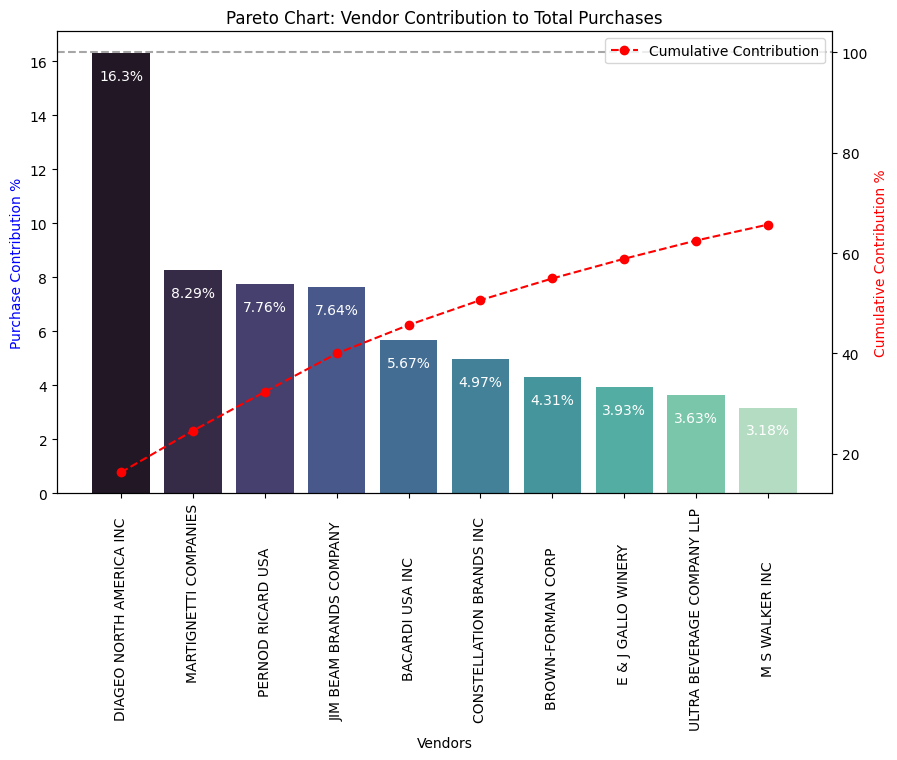

In [35]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contributions
sns.barplot(x=Top_vendors['VendorName'], 
            y=Top_vendors['PurchaseContribution%'], 
            palette="mako", 
            ax=ax1)

for i, value in enumerate(Top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, 
             str(value) + '%', 
             ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(Top_vendors['VendorName'], 
         Top_vendors['cumulative_contribution%'], 
         color='red', marker='o', linestyle='dashed', 
         label='Cumulative Contribution')

ax1.set_xticklabels(Top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


In [36]:
print(f"Total Contribution of top 10 vendors is {round(Top_vendors['PurchaseContribution%'].sum(),2)}")

Total Contribution of top 10 vendors is 65.68


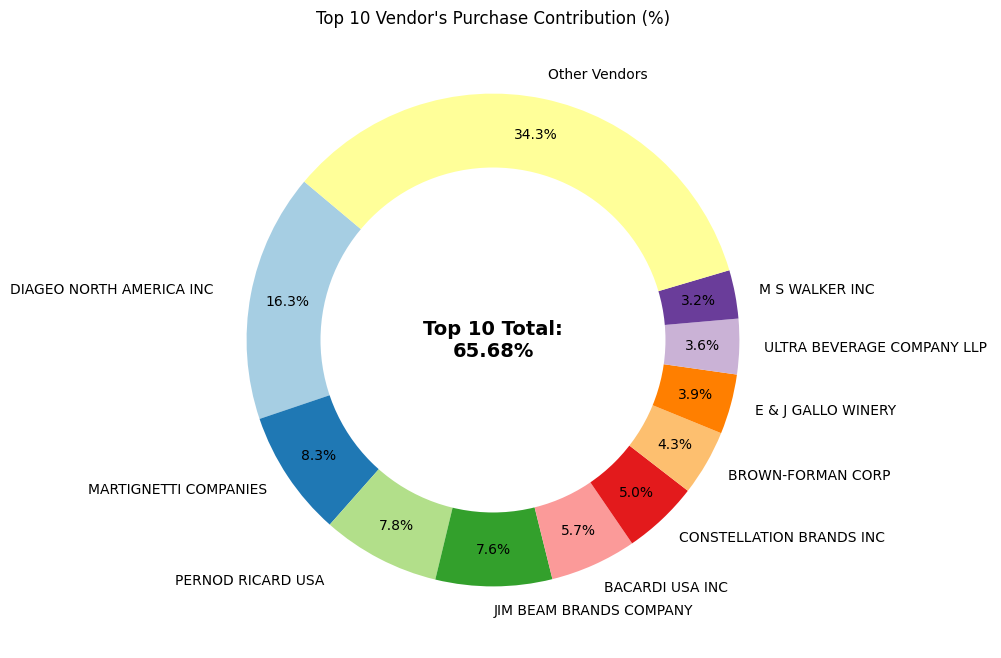

In [37]:
vendors = list(Top_vendors['VendorName'].values)
purchase_contributions = list(Top_vendors['PurchaseContribution%'].values)

total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


In [38]:
df['UnitPurchasePrice']=df['TotalPurchaseDollar']/df['totalPurchaseQuantity']

In [39]:
df['OrderSize']=pd.qcut(df['totalPurchaseQuantity'],q=3,labels=["small","medium","Large"])

In [40]:
df

,index,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,totalPurchaseQuantity,TotalPurchaseDollar,...,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,Freightcost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize
0,0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,BROWN-FORMAN CORP,36.99,145080,3811251.60,...,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,MARTIGNETTI COMPANIES,28.99,164038,3804041.22,...,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,PERNOD RICARD USA,24.99,187407,3418303.68,...,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,DIAGEO NORTH AMERICA INC,22.99,201682,3261197.94,...,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,DIAGEO NORTH AMERICA INC,29.99,138109,3023206.01,...,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,WINE GROUP INC,4.99,2,2.64,...,10.96,15.95,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,small
8560,10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,SAZERAC CO INC,0.49,6,2.34,...,1.47,65.66,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,small
8561,10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,HEAVEN HILL DISTILLERIES,0.99,2,1.48,...,0.99,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,small
8562,10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,DIAGEO NORTH AMERICA INC,1.99,1,1.47,...,77.61,143.28,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,small


In [41]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

OrderSize
small     39.068186
medium    15.486414
Large     10.777625
Name: UnitPurchasePrice, dtype: float64

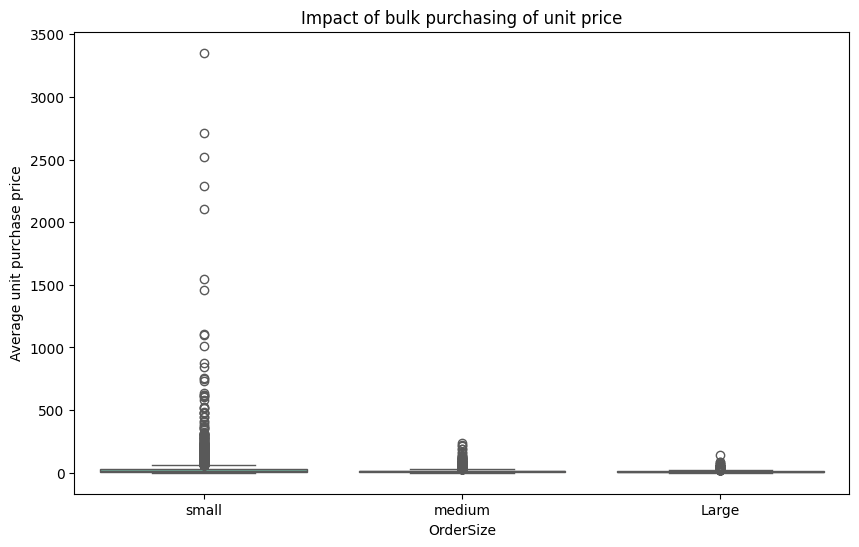

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of bulk purchasing of unit price")
plt.xlabel("OrderSize")
plt.ylabel("Average unit purchase price")
plt.show()

In [43]:
# which vendor have low inventory turnover , indicating excess stock and slow moving products?

df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver',ascending=True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [44]:
# How much capital is locked in unsold inventory per vendor, and which vendor is contribute the most of it ?

df['UnsoldInventoryValues']=(df["totalPurchaseQuantity"]-df["TotalSalesQuantity"])*df['PurchasePrice']
print("Total unsold capital:",format_dollar(df['UnsoldInventoryValues'].sum()))

Total unsold capital: 2.71M


In [45]:
#Aggregate capital locked per vendor

inventory_value_per_vendor=df.groupby("VendorName")["UnsoldInventoryValues"].sum().reset_index()

#sort vendor with the highest locked capital

inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValues",ascending=False)
inventory_value_per_vendor["UnsoldInventoryValues"]=inventory_value_per_vendor["UnsoldInventoryValues"].apply(format_dollar)
inventory_value_per_vendor.head(10).reset_index(drop= True)





,VendorName,UnsoldInventoryValues
0,DIAGEO NORTH AMERICA INC,722.21K
1,JIM BEAM BRANDS COMPANY,554.67K
2,PERNOD RICARD USA,470.63K
3,WILLIAM GRANT & SONS INC,401.96K
4,E & J GALLO WINERY,228.28K
5,SAZERAC CO INC,198.44K
6,BROWN-FORMAN CORP,177.73K
7,CONSTELLATION BRANDS INC,133.62K
8,MOET HENNESSY USA INC,126.48K
9,REMY COINTREAU USA INC,118.60K


In [46]:

top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

top_vendor=df[df["TotalSalesDollars"]>= top_threshold]["ProfitMargin"].dropna()
low_vendor=df[df["TotalSalesDollars"]<= low_threshold]["ProfitMargin"].dropna()


In [47]:
low_vendor

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [48]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


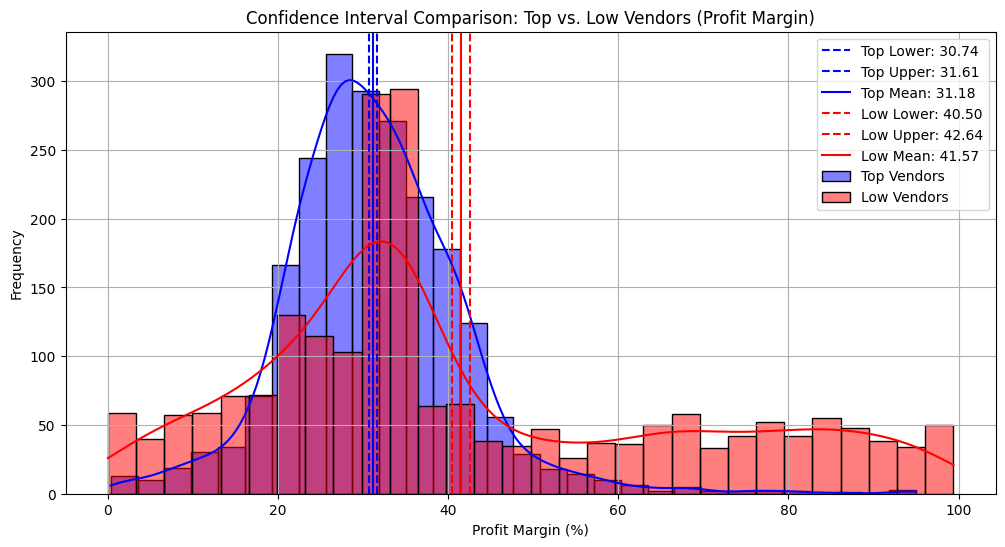

In [49]:
top_mean, top_lower, top_upper = confidence_interval(top_vendor)
low_mean, low_lower, low_upper = confidence_interval(low_vendor)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(
    top_vendor,
    kde=True,
    color="blue",
    bins=30,
    alpha=0.5,
    label="Top Vendors"
)
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(
    low_vendor,
    kde=True,
    color="red",
    bins=30,
    alpha=0.5,
    label="Low Vendors"
)
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [51]:
df.to_csv("final_sales_data.csv", index=False)

In [52]:
Purchase_contributions_table=pd.DataFrame({"VendorName":vendors, "PurchaseContributionPercent": purchase_contributions})

In [53]:
Purchase_contributions_table.to_csv("Purchase_contributions_table.csv",index=False)